### **Exploration of the Auto-MPG Dataset found at UCI Machine Learning Repository**

https://archive.ics.uci.edu/ml/datasets/auto+mpg

##### TS02 Big Data resources; Data Description, Cardinality vs Dimensionality, Data Quality, Sampling.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# https://github.com/pandas-profiling/pandas-profiling
!pip install pandas-profiling

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 324.4/324.4 kB 3.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 357.5/357.5 kB 8.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 395.8/395.8 kB 7.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 102.7/102.7 kB 9.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 679.5/679.5 kB 10.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 10.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 19.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 28.1 MB/s eta 0:00:00
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27081 sha256=c0397992ec57762404ae6b031e5a0d5ae37a0ef645ded5df3595a95f8cfabf24
  Stored in directory: /root/.cache/pip/wheels/dd/91/29/a79cecb328d01739e64017b6fb9a1ab9d8cb1853098ec5966d
Successfully built htmlmin
  Attempting uninsta

In [ ]:
import os
import numpy as np
import pandas as pd
import sklearn
import matplotlib.pylab as plt
# from pandas_profiling import ProfileReport
import warnings
warnings.filterwarnings("ignore")

In [ ]:
## Reading data directly from UCI

df = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data', sep='\s+')
df.columns=['mpg','cylinders','displacement','horsepower','weight','acceleration','model year','origin','car name']
df.head()
# df = pd.read_fwf('auto-mpg.data', sep='\s+')
# df.columns=['mpg','cylinders','displacement','horsepower','weight','acceleration','model year','origin','car name']
# df.head()




mpg  cylinders  displacement horsepower  weight  acceleration  model year  \
0  15.0          8         350.0      165.0  3693.0          11.5          70   
1  18.0          8         318.0      150.0  3436.0          11.0          70   
2  16.0          8         304.0      150.0  3433.0          12.0          70   
3  17.0          8         302.0      140.0  3449.0          10.5          70   
4  15.0          8         429.0      198.0  4341.0          10.0          70   

   origin            car name  
0       1   buick skylark 320  
1       1  plymouth satellite  
2       1       amc rebel sst  
3       1         ford torino  
4       1    ford galaxie 500

In [ ]:
# 'Save the dataframe as a csv file with columns'
# df.to_csv('Auto_mpg.csv')


Dimensionality and cardinality of Data

In [ ]:
df.shape
print('data has a cardinality size {}'.format(df.shape[0]) +
      ' and dimensionality size {}'.format(df.shape[1]))

data has a cardinality size 397 and dimensionality size 9


In [ ]:
'ATTRIBUTE TYPES: INTEGER, FLOAT AND OBJECTS'
df.info()
# df.isnull().values.any()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 397 entries, 0 to 396
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           397 non-null    float64
 1   cylinders     397 non-null    int64  
 2   displacement  397 non-null    float64
 3   horsepower    397 non-null    object 
 4   weight        397 non-null    float64
 5   acceleration  397 non-null    float64
 6   model year    397 non-null    int64  
 7   origin        397 non-null    int64  
 8   car name      397 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 28.0+ KB


In [ ]:
'number of distinct observations per group for each column'
df.nunique()

mpg             129
cylinders         5
displacement     82
horsepower       94
weight          350
acceleration     95
model year       13
origin            3
car name        305
dtype: int64

In [ ]:
# using groupby function with aggregation
# to get mean, min and max values of mpg and weight grouped by car name
df.groupby('car name').agg({'mpg': ['mean', 'min', 'max'], 'weight':
                            ['mean', 'min', 'max']})
# df[df['car name'] == 'amc ambassador brougham']

mpg              weight                
                          mean   min   max    mean     min     max
car name                                                          
amc ambassador brougham  13.00  13.0  13.0  3821.0  3821.0  3821.0
amc ambassador dpl       15.00  15.0  15.0  3850.0  3850.0  3850.0
amc ambassador sst       17.00  17.0  17.0  3672.0  3672.0  3672.0
amc concord              21.85  19.4  24.3  3106.5  3003.0  3210.0
amc concord d/l          18.10  18.1  18.1  3410.0  3410.0  3410.0
...                        ...   ...   ...     ...     ...     ...
vw dasher (diesel)       43.40  43.4  43.4  2335.0  2335.0  2335.0
vw pickup                44.00  44.0  44.0  2130.0  2130.0  2130.0
vw rabbit                35.25  29.0  41.5  2040.5  1937.0  2144.0
vw rabbit c (diesel)     44.30  44.3  44.3  2085.0  2085.0  2085.0
vw rabbit custom         31.90  31.9  31.9  1925.0  1925.0  1925.0

[305 rows x 6 columns]

In [ ]:
# using groupby function with custom aggregation
# create 95% confidence interval for population mean weight (normal distribution)
# https://docs.scipy.org/doc/scipy/reference/stats.html
import scipy.stats as st

def f(x):
  return st.norm.interval(alpha=0.68, loc=np.mean(x), scale=st.sem(x))

df.groupby('car name').agg({'mpg': ['mean', 'min', 'max', len, f], 'weight':
                            ['mean', 'min', 'max']})


mpg              ...  weight                
                          mean   min   max  ...    mean     min     max
car name                                    ...                        
amc ambassador brougham  13.00  13.0  13.0  ...  3821.0  3821.0  3821.0
amc ambassador dpl       15.00  15.0  15.0  ...  3850.0  3850.0  3850.0
amc ambassador sst       17.00  17.0  17.0  ...  3672.0  3672.0  3672.0
amc concord              21.85  19.4  24.3  ...  3106.5  3003.0  3210.0
amc concord d/l          18.10  18.1  18.1  ...  3410.0  3410.0  3410.0
...                        ...   ...   ...  ...     ...     ...     ...
vw dasher (diesel)       43.40  43.4  43.4  ...  2335.0  2335.0  2335.0
vw pickup                44.00  44.0  44.0  ...  2130.0  2130.0  2130.0
vw rabbit                35.25  29.0  41.5  ...  2040.5  1937.0  2144.0
vw rabbit c (diesel)     44.30  44.3  44.3  ...  2085.0  2085.0  2085.0
vw rabbit custom         31.90  31.9  31.9  ...  1925.0  1925.0  1925.0

[305 rows x 8 columns]

### **Data Cleaning**

In [ ]:
'Find the missing values'
df.isnull().sum()
# but horsepower datatype is object!

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model year      0
origin          0
car name        0
dtype: int64

In [ ]:
# Detect non numeric columns
df.select_dtypes(include='object')

horsepower            car name
0        165.0   buick skylark 320
1        150.0  plymouth satellite
2        150.0       amc rebel sst
3        140.0         ford torino
4        198.0    ford galaxie 500
..         ...                 ...
392      86.00     ford mustang gl
393      52.00           vw pickup
394      84.00       dodge rampage
395      79.00         ford ranger
396      82.00          chevy s-10

[397 rows x 2 columns]

In [ ]:
'some missing numbers (?) were identified in the horsepower feature during filtering'
df.horsepower.unique()

array(['165.0', '150.0', '140.0', '198.0', '220.0', '215.0', '225.0',
       '190.0', '170.0', '160.0', '95.00', '97.00', '85.00', '88.00',
       '46.00', '87.00', '90.00', '113.0', '200.0', '210.0', '193.0', '?',
       '100.0', '105.0', '175.0', '153.0', '180.0', '110.0', '72.00',
       '86.00', '70.00', '76.00', '65.00', '69.00', '60.00', '80.00',
       '54.00', '208.0', '155.0', '130.0', '112.0', '92.00', '145.0',
       '137.0', '158.0', '167.0', '94.00', '107.0', '230.0', '49.00',
       '75.00', '91.00', '122.0', '67.00', '83.00', '78.00', '52.00',
       '61.00', '93.00', '148.0', '129.0', '96.00', '71.00', '98.00',
       '115.0', '53.00', '81.00', '79.00', '120.0', '152.0', '102.0',
       '108.0', '68.00', '58.00', '149.0', '89.00', '63.00', '48.00',
       '66.00', '139.0', '103.0', '125.0', '133.0', '138.0', '135.0',
       '142.0', '77.00', '62.00', '132.0', '84.00', '64.00', '74.00',
       '116.0', '82.00'], dtype=object)

In [ ]:
# Convert non-numeric types (e.g. strings) to a suitable numeric type
# Replace ? with nan
df.horsepower = pd.to_numeric(df.horsepower.replace('?', np.nan))
# missing_values = ["?"]
# df = pd.read_csv("", na_values = missing_values)
# Another way to remove missing values (by dropping)
# df = df[df.horsepower != '?']


In [ ]:
df.horsepower.unique()

array([165., 150., 140., 198., 220., 215., 225., 190., 170., 160.,  95.,
        97.,  85.,  88.,  46.,  87.,  90., 113., 200., 210., 193.,  nan,
       100., 105., 175., 153., 180., 110.,  72.,  86.,  70.,  76.,  65.,
        69.,  60.,  80.,  54., 208., 155., 130., 112.,  92., 145., 137.,
       158., 167.,  94., 107., 230.,  49.,  75.,  91., 122.,  67.,  83.,
        78.,  52.,  61.,  93., 148., 129.,  96.,  71.,  98., 115.,  53.,
        81.,  79., 120., 152., 102., 108.,  68.,  58., 149.,  89.,  63.,
        48.,  66., 139., 103., 125., 133., 138., 135., 142.,  77.,  62.,
       132.,  84.,  64.,  74., 116.,  82.])

In [ ]:
'Total number of missing values in each column'
number_missing_values = df.isnull().sum()
number_missing_values

mpg             0
cylinders       0
displacement    0
horsepower      6
weight          0
acceleration    0
model year      0
origin          0
car name        0
dtype: int64

##### Missing values can be handled in a number of ways:
https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.fillna.html

##### Fill null values with mean, median and mode
```
df['A'] = df['A'].fillna(df['A'].mean())

df['A'] = df['A'].fillna(df['A'].median())

df['A'] = df['A'].fillna(df['A'].mode())
```

##### Backward fill
```
df['A'] = df['A'].fillna(method='bfill')
```
##### Forward fill
```
df['A'] = df['A'].fillna(method='ffill')
```

In [ ]:
'Imputing the missing values with the mean'
# make a copy
df_mpg = df.copy()
df_mpg['horsepower'].fillna(df_mpg['horsepower'].mean(), inplace=True)

In [ ]:
df_mpg.isnull().sum()

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model year      0
origin          0
car name        0
dtype: int64

In [ ]:
'Data has both categorical and numerical/continous variables'
df.dtypes

mpg             float64
cylinders         int64
displacement    float64
horsepower      float64
weight          float64
acceleration    float64
model year        int64
origin            int64
car name         object
dtype: object

In [ ]:
# try to fill nan values with a custom function
def f(x):
  return np.std(x)/np.mean(x)

col = 'horsepower'
df_mpg = df.copy()
df_mpg[col].fillna(f(df_mpg[col]), inplace=True)
df_mpg = df.copy()
df_mpg[col].fillna(np.var(df_mpg[col]), inplace=True)

In [ ]:
df.dtypes

mpg             float64
cylinders         int64
displacement    float64
horsepower      float64
weight          float64
acceleration    float64
model year        int64
origin            int64
car name         object
dtype: object

Another was to replace nan values is use pandas rolling function, pandas.Series.interpolate, or transform

https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.interpolate.html

https://stackoverflow.com/questions/25234782/replace-nan-or-missing-values-with-rolling-mean-or-other-interpolation

https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.transform.html


Other ways to fill the missing values:

https://towardsdatascience.com/using-pandas-transform-and-apply-to-deal-with-missing-data-on-a-group-level-cb6ccf060531



**Find duplicate records**

In [ ]:
df_mpg.duplicated().sum()

0

#### TS03 DATA EXPLORATION

In [ ]:
'Statistical summary of the dataset'
display(df_mpg.describe())

# mpg
# Minimum value is 9 and
# Maximum is 46
# Average it is 23.44
# Variation of 7.8

mpg   cylinders  ...  model year      origin
count  397.000000  397.000000  ...  397.000000  397.000000
mean    23.528463    5.448363  ...   76.025189    1.574307
std      7.820926    1.698329  ...    3.689922    0.802549
min      9.000000    3.000000  ...   70.000000    1.000000
25%     17.500000    4.000000  ...   73.000000    1.000000
50%     23.000000    4.000000  ...   76.000000    1.000000
75%     29.000000    8.000000  ...   79.000000    2.000000
max     46.600000    8.000000  ...   82.000000    3.000000

[8 rows x 8 columns]

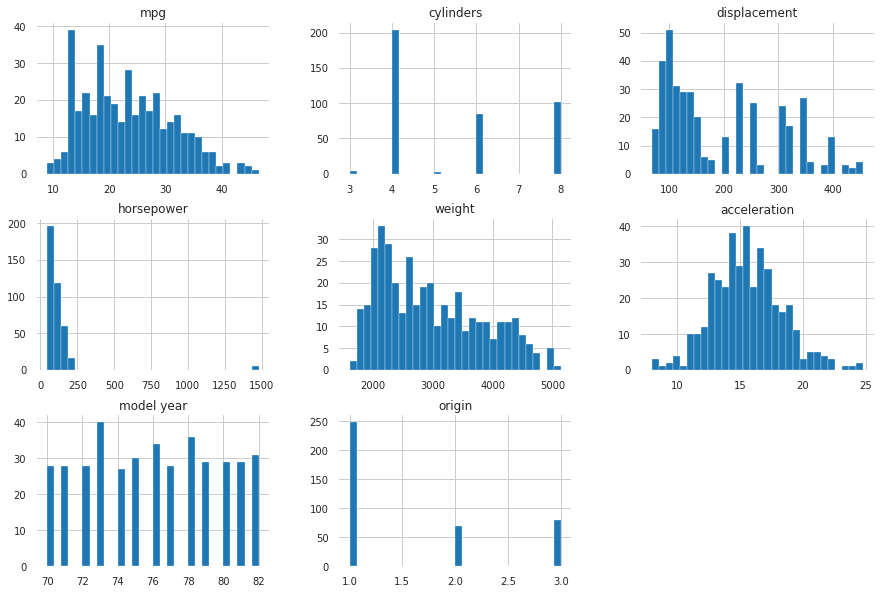

In [ ]:
'DISTRIBUTION OF THE FEATURES'
'Plotting Histogram for attributes'
df_mpg.hist(figsize=(15,10),bins=30)
plt.show()

In [ ]:
df.groupby('horsepower').mpg.nunique()

horsepower
46.0     1
48.0     3
49.0     1
52.0     4
53.0     1
        ..
210.0    1
215.0    3
220.0    1
225.0    2
230.0    1
Name: mpg, Length: 93, dtype: int64

In [ ]:
df_mpg.horsepower.nunique()


94

In [ ]:
df_mpg.columns

Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'model year', 'origin', 'car name'],
      dtype='object')

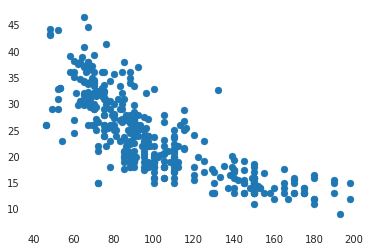

In [ ]:
# Removing some outliers

col = 'horsepower'
df_hp =  df_mpg[df_mpg[col]<200].copy()
plt.scatter(df_hp[col], df_hp.mpg)

In [ ]:
df_mpg.horsepower.unique()

array([ 165.        ,  150.        ,  140.        ,  198.        ,
        220.        ,  215.        ,  225.        ,  190.        ,
        170.        ,  160.        ,   95.        ,   97.        ,
         85.        ,   88.        ,   46.        ,   87.        ,
         90.        ,  113.        ,  200.        ,  210.        ,
        193.        , 1479.89809067,  100.        ,  105.        ,
        175.        ,  153.        ,  180.        ,  110.        ,
         72.        ,   86.        ,   70.        ,   76.        ,
         65.        ,   69.        ,   60.        ,   80.        ,
         54.        ,  208.        ,  155.        ,  130.        ,
        112.        ,   92.        ,  145.        ,  137.        ,
        158.        ,  167.        ,   94.        ,  107.        ,
        230.        ,   49.        ,   75.        ,   91.        ,
        122.        ,   67.        ,   83.        ,   78.        ,
         52.        ,   61.        ,   93.        ,  148.     

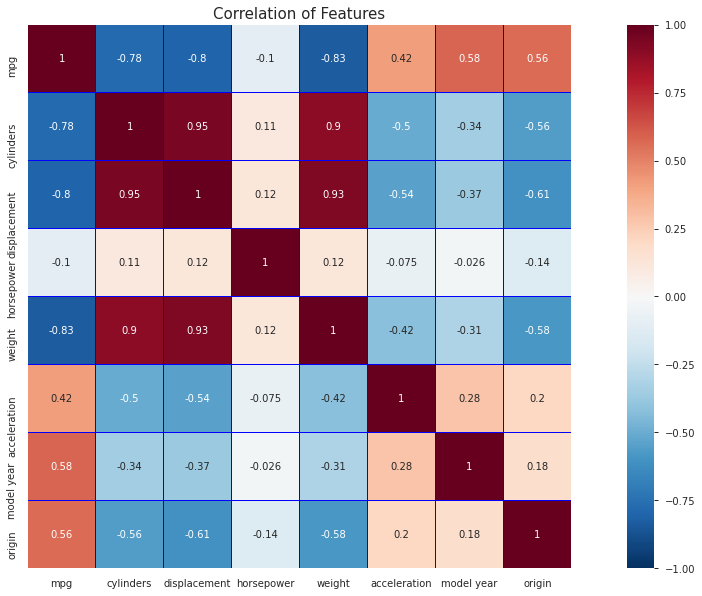

In [ ]:
#Exploratory data analysis
import seaborn as sns
colormap = plt.cm.RdBu_r
plt.figure(figsize=(20,10))
plt.title('Correlation of Features', y=1, size=15)
sns.heatmap(df_mpg.corr(), linewidths=0.15,vmin=-1.0, vmax=1.0,
            square=True, cmap=colormap, linecolor='blue', annot=True)

In [ ]:
'DIMENSIONALITY REDUCTION'
'Check for Multi-collinearity by Identifying and removing the highly correlated features'
# Create correlation matrix
corr_matrix = df_mpg.corr().abs()

# Select lower triangle of correlation matrix
lower = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

# Find index of feature columns with correlation greater than 0.90
high_corr = [column for column in lower.columns if any(lower[column] >= 0.90)]

In [ ]:
high_corr

['displacement', 'weight']

In [ ]:
collinear_df = pd.DataFrame(columns = ['drop_feature', 'corr_feature', 'corr_value'])

for column in high_corr:
            # Find the correlated features
            corr_features = list(lower.index[lower[column].abs() > 0.9])
            # Find the correlated values
            corr_values = list(lower[column][lower[column].abs() > 0.9])
            drop_features = [column for _ in range(len(corr_features))]
            temp_df = pd.DataFrame.from_dict({'drop_feature': drop_features,
                                             'corr_feature': corr_features,
                                             'corr_value': corr_values})

            # Add to dataframe
            collinear_df = collinear_df.append(temp_df, ignore_index = True)

In [ ]:
collinear_df

drop_feature  corr_feature  corr_value
0  displacement     cylinders    0.950718
1        weight  displacement    0.932957

In [ ]:
# df_mpg = df_mpg.drop(columns=high_corr)


In [ ]:
# df_mpg

'10 outliers are identified between 200 and 250'

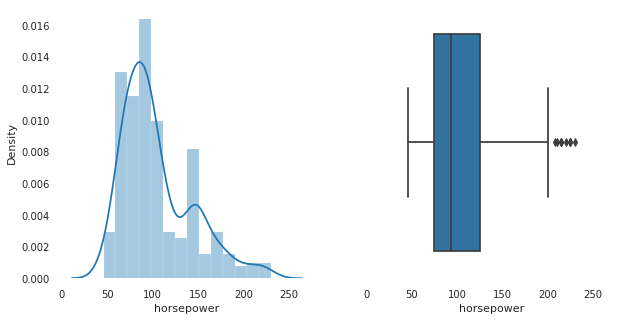

In [ ]:
# distribution plot with box plot
# https://seaborn.pydata.org/generated/seaborn.distplot.html
df_mpg =df.copy()
f, axes = plt.subplots(1, 2, figsize=(10, 5), sharex=True)
sns.distplot(df_mpg['horsepower'], ax = axes[0])
sns.boxplot(df_mpg['horsepower'], ax = axes[1])
## How many outliers between values 200 and 250
# Your code her
'{} outliers are identified between 200 and 250'.format(sum(df_mpg['horsepower']>200))


In [ ]:
# col = 'horsepower'
# df_hp =  df_mpg[df_mpg[col]<200].copy()
# plt.scatter(df_hp[col], df_hp.mpg)

'1 outliers are identified between 45 and 50'

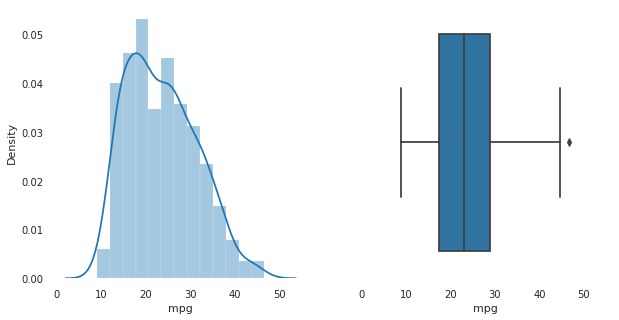

In [ ]:
# Show distribution plot with box plot of mpg
# Your code here
f, axes = plt.subplots(1, 2, figsize=(10, 5), sharex=True)
sns.distplot(df_mpg['mpg'], ax = axes[0])
sns.boxplot(df_mpg['mpg'], ax = axes[1])

## How many outliers between values 200 and 250
# Your code heer
'{} outliers are identified between 45 and 50'.format(sum(df_mpg['mpg']
                                                          >= 45))


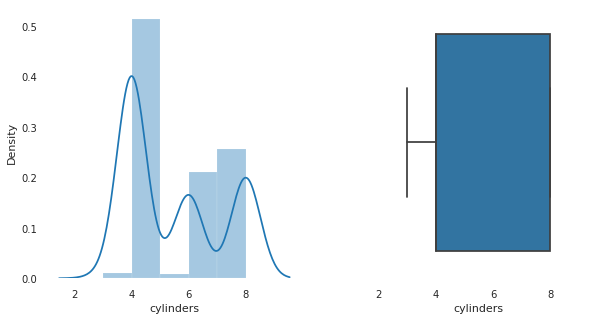

In [ ]:
f, axes = plt.subplots(1, 2, figsize=(10, 5), sharex=True)
sns.distplot(df_mpg['cylinders'], ax = axes[0])
sns.boxplot(df_mpg['cylinders'], ax = axes[1])


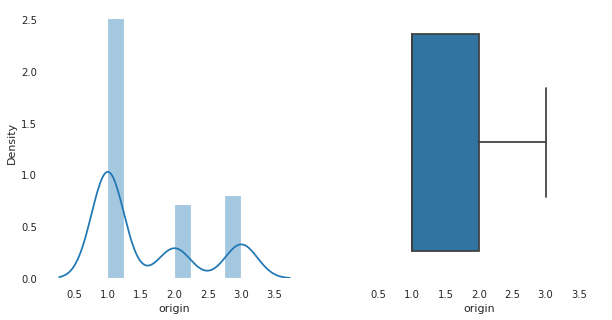

In [ ]:
f, axes = plt.subplots(1, 2, figsize=(10, 5), sharex=True)
sns.distplot(df_mpg['origin'], ax = axes[0])
sns.boxplot(df_mpg['origin'], ax = axes[1])


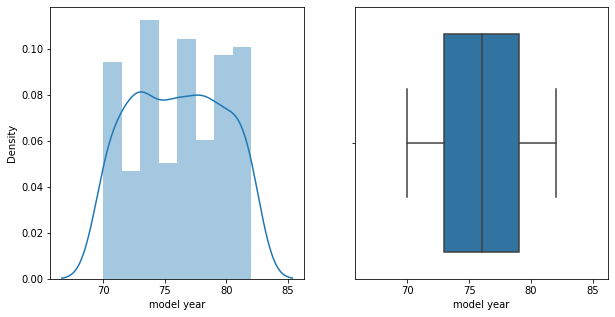

In [ ]:
f, axes = plt.subplots(1, 2, figsize=(10, 5), sharex=True)
sns.distplot(df_mpg['model year'], ax = axes[0])
sns.boxplot(df_mpg['model year'], ax = axes[1])

In [ ]:
# var = 'model year'
# data_plt = pd.concat([df_mpg['mpg'], df_mpg[var]], axis=1)
# f, ax = plt.subplots(figsize=(8, 6))
# fig = sns.boxplot(x=var, y="mpg", data=data_plt)
# # fig.axis(ymin=0, ymax=1)
# plt.axhline(df_mpg.mpg.mean(),color='r',linestyle='dashed',linewidth=2)

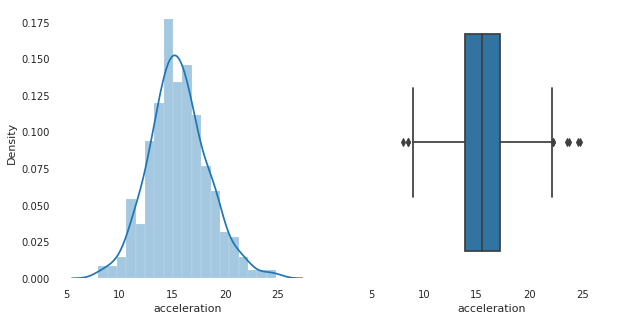

In [ ]:
f, axes = plt.subplots(1, 2, figsize=(10, 5), sharex=True)
sns.distplot(df_mpg['acceleration'], ax = axes[0])
sns.boxplot(df_mpg['acceleration'], ax = axes[1])

In [ ]:
df

mpg  cylinders  displacement  ...  model year  origin            car name
0    15.0          8         350.0  ...          70       1   buick skylark 320
1    18.0          8         318.0  ...          70       1  plymouth satellite
2    16.0          8         304.0  ...          70       1       amc rebel sst
3    17.0          8         302.0  ...          70       1         ford torino
4    15.0          8         429.0  ...          70       1    ford galaxie 500
..    ...        ...           ...  ...         ...     ...                 ...
392  27.0          4         140.0  ...          82       1     ford mustang gl
393  44.0          4          97.0  ...          82       2           vw pickup
394  32.0          4         135.0  ...          82       1       dodge rampage
395  28.0          4         120.0  ...          82       1         ford ranger
396  31.0          4         119.0  ...          82       1          chevy s-10

[397 rows x 9 columns]

### DATA IMBALANCE

'AFTER BINNING THE DATASET (mpg>=28), A BINARY AND 2 MULTI-CLASS CLASSIFICATION DATASET WAS CREATED'

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving AutoMPG_Binary.csv to AutoMPG_Binary.csv


In [ ]:
'BINARY CLASSIFICATION'
missing_values = ["?"]
df_binary =  pd.read_csv('AutoMPG_Binary.csv', na_values = missing_values)
df_binary

mpg  cylinders  displacement  ...  origin                   car name  Class
0    18.0          8         307.0  ...       1  chevrolet chevelle malibu      0
1    15.0          8         350.0  ...       1          buick skylark 320      0
2    18.0          8         318.0  ...       1         plymouth satellite      0
3    16.0          8         304.0  ...       1              amc rebel sst      0
4    17.0          8         302.0  ...       1                ford torino      0
..    ...        ...           ...  ...     ...                        ...    ...
393  27.0          4         140.0  ...       1            ford mustang gl      0
394  44.0          4          97.0  ...       2                  vw pickup      1
395  32.0          4         135.0  ...       1              dodge rampage      1
396  28.0          4         120.0  ...       1                ford ranger      1
397  31.0          4         119.0  ...       1                 chevy s-10      1

[398 rows x 10 columns]

In [ ]:
'Total number of missing values in each column'
missing_values= df_binary.isnull().sum()
missing_values

mpg             0
cylinders       0
displacement    0
horsepower      6
weight          0
acceleration    0
model year      0
origin          0
car name        0
Class           0
dtype: int64

In [ ]:
'Imputing the missing values with the mean'
df_binary['horsepower'].fillna(int(df_binary['horsepower'].mean()), inplace=True)

In [ ]:
class_count = df_binary.Class.value_counts()
class_count

0    279
1    119
Name: Class, dtype: int64

Class 0: 279
Class 1: 119
Proportion: 2.34 : 1


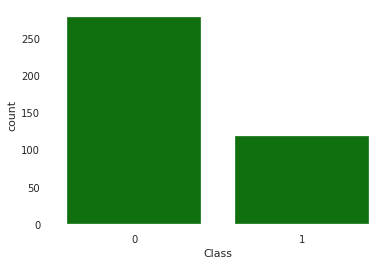

In [ ]:
import seaborn as sns
print('Class 0:', class_count[0])
print('Class 1:', class_count[1])
print('Proportion:', round(class_count[0] / class_count[1], 2), ': 1')
sns.countplot(df_binary['Class'], color='green')

### DATA TRANSFORMATION : BINNING

https://pbpython.com/pandas-qcut-cut.html

Text(0, 0.5, 'Frequency')

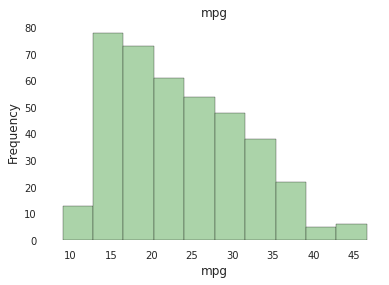

In [ ]:
'FIXED WIDTH BINNING'
fig, ax = plt.subplots()
df_binary['mpg'].hist(color='#abd3a9', edgecolor='black',
                          grid=False)
ax.set_title('mpg', fontsize=12)
ax.set_xlabel('mpg', fontsize=12)
ax.set_ylabel('Frequency', fontsize=12)

In [ ]:
df_binary.head()

mpg  cylinders  displacement  ...  origin                   car name  Class
0  18.0          8         307.0  ...       1  chevrolet chevelle malibu      0
1  15.0          8         350.0  ...       1          buick skylark 320      0
2  18.0          8         318.0  ...       1         plymouth satellite      0
3  16.0          8         304.0  ...       1              amc rebel sst      0
4  17.0          8         302.0  ...       1                ford torino      0

[5 rows x 10 columns]

In [ ]:
# cut the data into 4 equal bin sizes
df_cut = pd.cut(df_binary['mpg'], bins=4)
# df_cut = pd.cut(df_binary['mpg'], bins=4, labels=False)
print(df_cut, '\n')
print(df_cut.value_counts(), '\n')
# Manually define cut bins with names
cut_labels = ['Low', 'Moderate', 'High']
cut_bins = [0, 20, 35, 47]
print(pd.cut(df_binary['mpg'], bins=cut_bins, labels=cut_labels))

0      (8.962, 18.4]
1      (8.962, 18.4]
2      (8.962, 18.4]
3      (8.962, 18.4]
4      (8.962, 18.4]
           ...      
393     (18.4, 27.8]
394     (37.2, 46.6]
395     (27.8, 37.2]
396     (27.8, 37.2]
397     (27.8, 37.2]
Name: mpg, Length: 398, dtype: category
Categories (4, interval[float64]): [(8.962, 18.4] < (18.4, 27.8] < (27.8, 37.2] < (37.2, 46.6]] 

(18.4, 27.8]     152
(8.962, 18.4]    127
(27.8, 37.2]     100
(37.2, 46.6]      19
Name: mpg, dtype: int64 

0           Low
1           Low
2           Low
3           Low
4           Low
         ...   
393    Moderate
394        High
395    Moderate
396    Moderate
397    Moderate
Name: mpg, Length: 398, dtype: category
Categories (3, object): ['Low' < 'Moderate' < 'High']


In [ ]:
'QUANTILE BINNING'
quantile_list = [0, .25, .5, .75, 1.]
quantiles = df_binary['acceleration'].quantile(quantile_list)
quantiles

0.00     8.000
0.25    13.825
0.50    15.500
0.75    17.175
1.00    24.800
Name: acceleration, dtype: float64

In [ ]:
# Remove outliers for better results

# cut will calculate the size of each bin in order
# to make sure the distribution of data in the bins is equal.

# pd.qcut(df_binary['acceleration'], q=4, labels=False)
# pd.qcut(df_binary['acceleration'], q=[0, .2, .4, .6, .8, 1], labels=False, precision=0)
# pd.qcut(df_binary['acceleration'], q=4).value_counts()

Text(0, 0.5, 'Frequency')

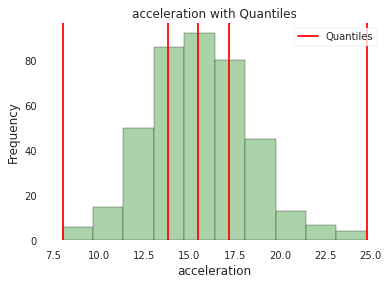

In [ ]:
'The red lines reflects the quartile values and our potential bins.'
'ADAPTIVE BINNING : 4-quantile'
fig, ax = plt.subplots()
df_binary['acceleration'].hist(bins=10, color='#abd3a9',
                             edgecolor='black', grid=False)
for quantile in quantiles:
    qvl = plt.axvline(quantile, color='r')
ax.legend([qvl], ['Quantiles'], fontsize=10)
ax.set_title('acceleration with Quantiles',
             fontsize=12)
ax.set_xlabel('acceleration', fontsize=12)
ax.set_ylabel('Frequency', fontsize=12)

In [ ]:
df_binary['Class'].value_counts(normalize = True)

0    0.701005
1    0.298995
Name: Class, dtype: float64

In [ ]:
'IT IS A MILD DEGREE OF DATA IMBALANCE AS THE PROPORTION FALLS WITHIN 20-40% OF THE DATASET'
# How unbalanced is the data
#ormalize (bool, default False) -
# If True then the object returned will contain the relative frequencies
# of the unique values.

print(round(df_binary['Class'].value_counts(normalize = True)*100, 2))

0    70.1
1    29.9
Name: Class, dtype: float64


### TO RESOLVE THE PROBLEM OF DATA IMBALANCE, WE WILL USE

### RESAMPLING (UNDERSAMPLING AND OVERSAMPLING)

### SMOTE

Resampling is a widely adopted technique for dealing with highly unbalanced datasets

It consists of removing samples from the majority class (under-sampling) and / or adding more examples from the minority class (over-sampling).



In [ ]:
# Class count
count_class_0, count_class_1 = df_binary.Class.value_counts()

# Divide by class
df_class_0 = df_binary[df_binary['Class'] == 0]
df_class_1 = df_binary[df_binary['Class'] == 1]

Random under-sampling:
1    119
0    119
Name: Class, dtype: int64


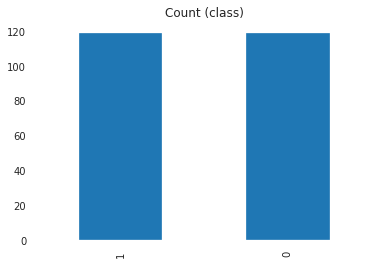

In [ ]:
'RANDOM UNDERSAMPLING'
df_class_0_under = df_class_0.sample(count_class_1)
df_test_under = pd.concat([df_class_0_under, df_class_1], axis=0)

print('Random under-sampling:')
print(df_test_under.Class.value_counts())

df_test_under.Class.value_counts().plot(kind='bar', title='Count (class)');

Random over-sampling:
1    279
0    279
Name: Class, dtype: int64


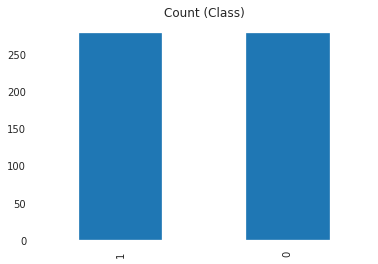

In [ ]:
'OVERSAMPLING'
df_class_1_over = df_class_1.sample(count_class_0, replace=True)
df_test_over = pd.concat([df_class_0, df_class_1_over], axis=0)

print('Random over-sampling:')
print(df_test_over.Class.value_counts())

df_test_over.Class.value_counts().plot(kind='bar', title='Count (Class)');

In [ ]:
'Instead of dropping the car feature we will encode it or index it'
from sklearn.preprocessing import LabelEncoder

In [ ]:
'creating instance of labelencoder'
labelencoder = LabelEncoder()

In [ ]:
'Assigning numerical values and storing in another column'
df_binary['car_name'] = labelencoder.fit_transform(df_binary['car name'])
df_binary

mpg  cylinders  displacement  ...                   car name  Class  car_name
0    18.0          8         307.0  ...  chevrolet chevelle malibu      0        49
1    15.0          8         350.0  ...          buick skylark 320      0        36
2    18.0          8         318.0  ...         plymouth satellite      0       231
3    16.0          8         304.0  ...              amc rebel sst      0        14
4    17.0          8         302.0  ...                ford torino      0       161
..    ...        ...           ...  ...                        ...    ...       ...
393  27.0          4         140.0  ...            ford mustang gl      0       153
394  44.0          4          97.0  ...                  vw pickup      1       301
395  32.0          4         135.0  ...              dodge rampage      1       119
396  28.0          4         120.0  ...                ford ranger      1       159
397  31.0          4         119.0  ...                 chevy s-10      1        69

[398 rows x 11 columns]

In [ ]:
'dropping the old car feature'
df_binary = df_binary.drop('car name',axis=1)
df_binary

mpg  cylinders  displacement  ...  origin  Class  car_name
0    18.0          8         307.0  ...       1      0        49
1    15.0          8         350.0  ...       1      0        36
2    18.0          8         318.0  ...       1      0       231
3    16.0          8         304.0  ...       1      0        14
4    17.0          8         302.0  ...       1      0       161
..    ...        ...           ...  ...     ...    ...       ...
393  27.0          4         140.0  ...       1      0       153
394  44.0          4          97.0  ...       2      1       301
395  32.0          4         135.0  ...       1      1       119
396  28.0          4         120.0  ...       1      1       159
397  31.0          4         119.0  ...       1      1        69

[398 rows x 10 columns]

In [ ]:
'WE DELETE MPG, DISPLACEMENT AND WEIGHT FEATURES DUE TO MULTI-COLINEARITY ISSUES FROM PREVIOUS WORK'
df_binary = df_binary.drop(['displacement', 'weight', 'mpg'], axis = 1)
df_binary

cylinders  horsepower  acceleration  model year  origin  Class  car_name
0            8       130.0          12.0          70       1      0        49
1            8       165.0          11.5          70       1      0        36
2            8       150.0          11.0          70       1      0       231
3            8       150.0          12.0          70       1      0        14
4            8       140.0          10.5          70       1      0       161
..         ...         ...           ...         ...     ...    ...       ...
393          4        86.0          15.6          82       1      0       153
394          4        52.0          24.6          82       2      1       301
395          4        84.0          11.6          82       1      1       119
396          4        79.0          18.6          82       1      1       159
397          4        82.0          19.4          82       1      1        69

[398 rows x 7 columns]

In [ ]:
#### Independent and Dependent Features
X = df_binary.drop("Class",axis=1)
y = df_binary.Class

Synthetic Minority Oversampling Technique (SMOTE) is an oversampling technique

In a classic oversampling technique, the minority data is duplicated from the minority data population.

https://imbalanced-learn.org/stable/references/generated/imblearn.over_sampling.SMOTE.html


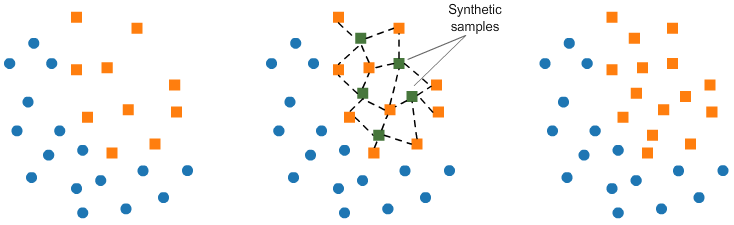

In [ ]:
'SMOTE'

from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

os = SMOTE(random_state= 0)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
columns = X_train.columns

os_data_X, os_data_y = os.fit_sample(X_train, y_train)
os_data_X = pd.DataFrame(data=os_data_X, columns=columns )
os_data_y = pd.DataFrame(data=os_data_y,columns=['y'])
# we can Check the numbers of our data
print("length of oversampled data is ", len(os_data_X))
print("Number of no subscription in oversampled data",len(os_data_y[os_data_y['y'] == 0]))
print("Number of subscription",len(os_data_y[os_data_y['y'] == 1]))
print("Proportion of no subscription data in oversampled data is ",len(os_data_y[os_data_y['y']==0])/len(os_data_X))
print("Proportion of subscription data in oversampled data is ",len(os_data_y[os_data_y['y']==1])/len(os_data_X))

length of oversampled data is  392
Number of no subscription in oversampled data 196
Number of subscription 196
Proportion of no subscription data in oversampled data is  0.5
Proportion of subscription data in oversampled data is  0.5


In [ ]:
# Data passport
# https://github.com/pandas-profiling/pandas-profiling
import pandas as pd
from pandas_profiling import ProfileReport


df = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data', sep='\s+')
df.columns=['mpg','cylinders','displacement','horsepower','weight','acceleration','model year','origin','car name']

profile = ProfileReport(df, title="Pandas Profiling Report", explorative=True)

In [ ]:
profile

Summarize dataset:   0%|          | 0/23 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]